In [70]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

In [71]:
df = pd.read_csv('/Users/ahmadelhatto/Downloads/archive (2)/Training.csv')

df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [72]:
df.shape

(4920, 134)

In [73]:
df.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [74]:
df = df.drop(df.columns[-1], axis=1)

In [75]:
df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [76]:
df.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [77]:
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [78]:
for col in df.columns:
    print(f"{df[col].value_counts()}\n")

itching
0    4242
1     678
Name: count, dtype: int64

skin_rash
0    4134
1     786
Name: count, dtype: int64

nodal_skin_eruptions
0    4812
1     108
Name: count, dtype: int64

continuous_sneezing
0    4698
1     222
Name: count, dtype: int64

shivering
0    4812
1     108
Name: count, dtype: int64

chills
0    4122
1     798
Name: count, dtype: int64

joint_pain
0    4236
1     684
Name: count, dtype: int64

stomach_pain
0    4698
1     222
Name: count, dtype: int64

acidity
0    4698
1     222
Name: count, dtype: int64

ulcers_on_tongue
0    4812
1     108
Name: count, dtype: int64

muscle_wasting
0    4812
1     108
Name: count, dtype: int64

vomiting
0    3006
1    1914
Name: count, dtype: int64

burning_micturition
0    4704
1     216
Name: count, dtype: int64

spotting_ urination
0    4812
1     108
Name: count, dtype: int64

fatigue
0    2988
1    1932
Name: count, dtype: int64

weight_gain
0    4806
1     114
Name: count, dtype: int64

anxiety
0    4806
1     114
Name: count

In [79]:
y = df['prognosis']
X = df.drop(columns = ['prognosis'])

In [80]:
test_data = pd.read_csv('/Users/ahmadelhatto/Downloads/archive (2)/Testing.csv')
y_test = test_data['prognosis']
X_test = test_data.drop(columns = ['prognosis'])

In [81]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
predicted = clf.predict(X_test)

In [82]:
predicted

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Chicken pox'],
      dtype=object)

In [83]:
clf.score(x_test, y_test)

0.9761904761904762

In [107]:
feature_names_list = X.columns.tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=1000)
tree.plot_tree(clf, max_depth = 20, feature_names = feature_names_list, filled=True)
plt.show()

In [85]:
fi = clf.feature_importances_
fi = pd.Series(data = fi, index = feature_names_list)
fi.sort_values(ascending = False, inplace = True)

/var/folders/n3/3rgmf1957v370m0_cpff1flr0000gn/T/ipykernel_96664/3567299610.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


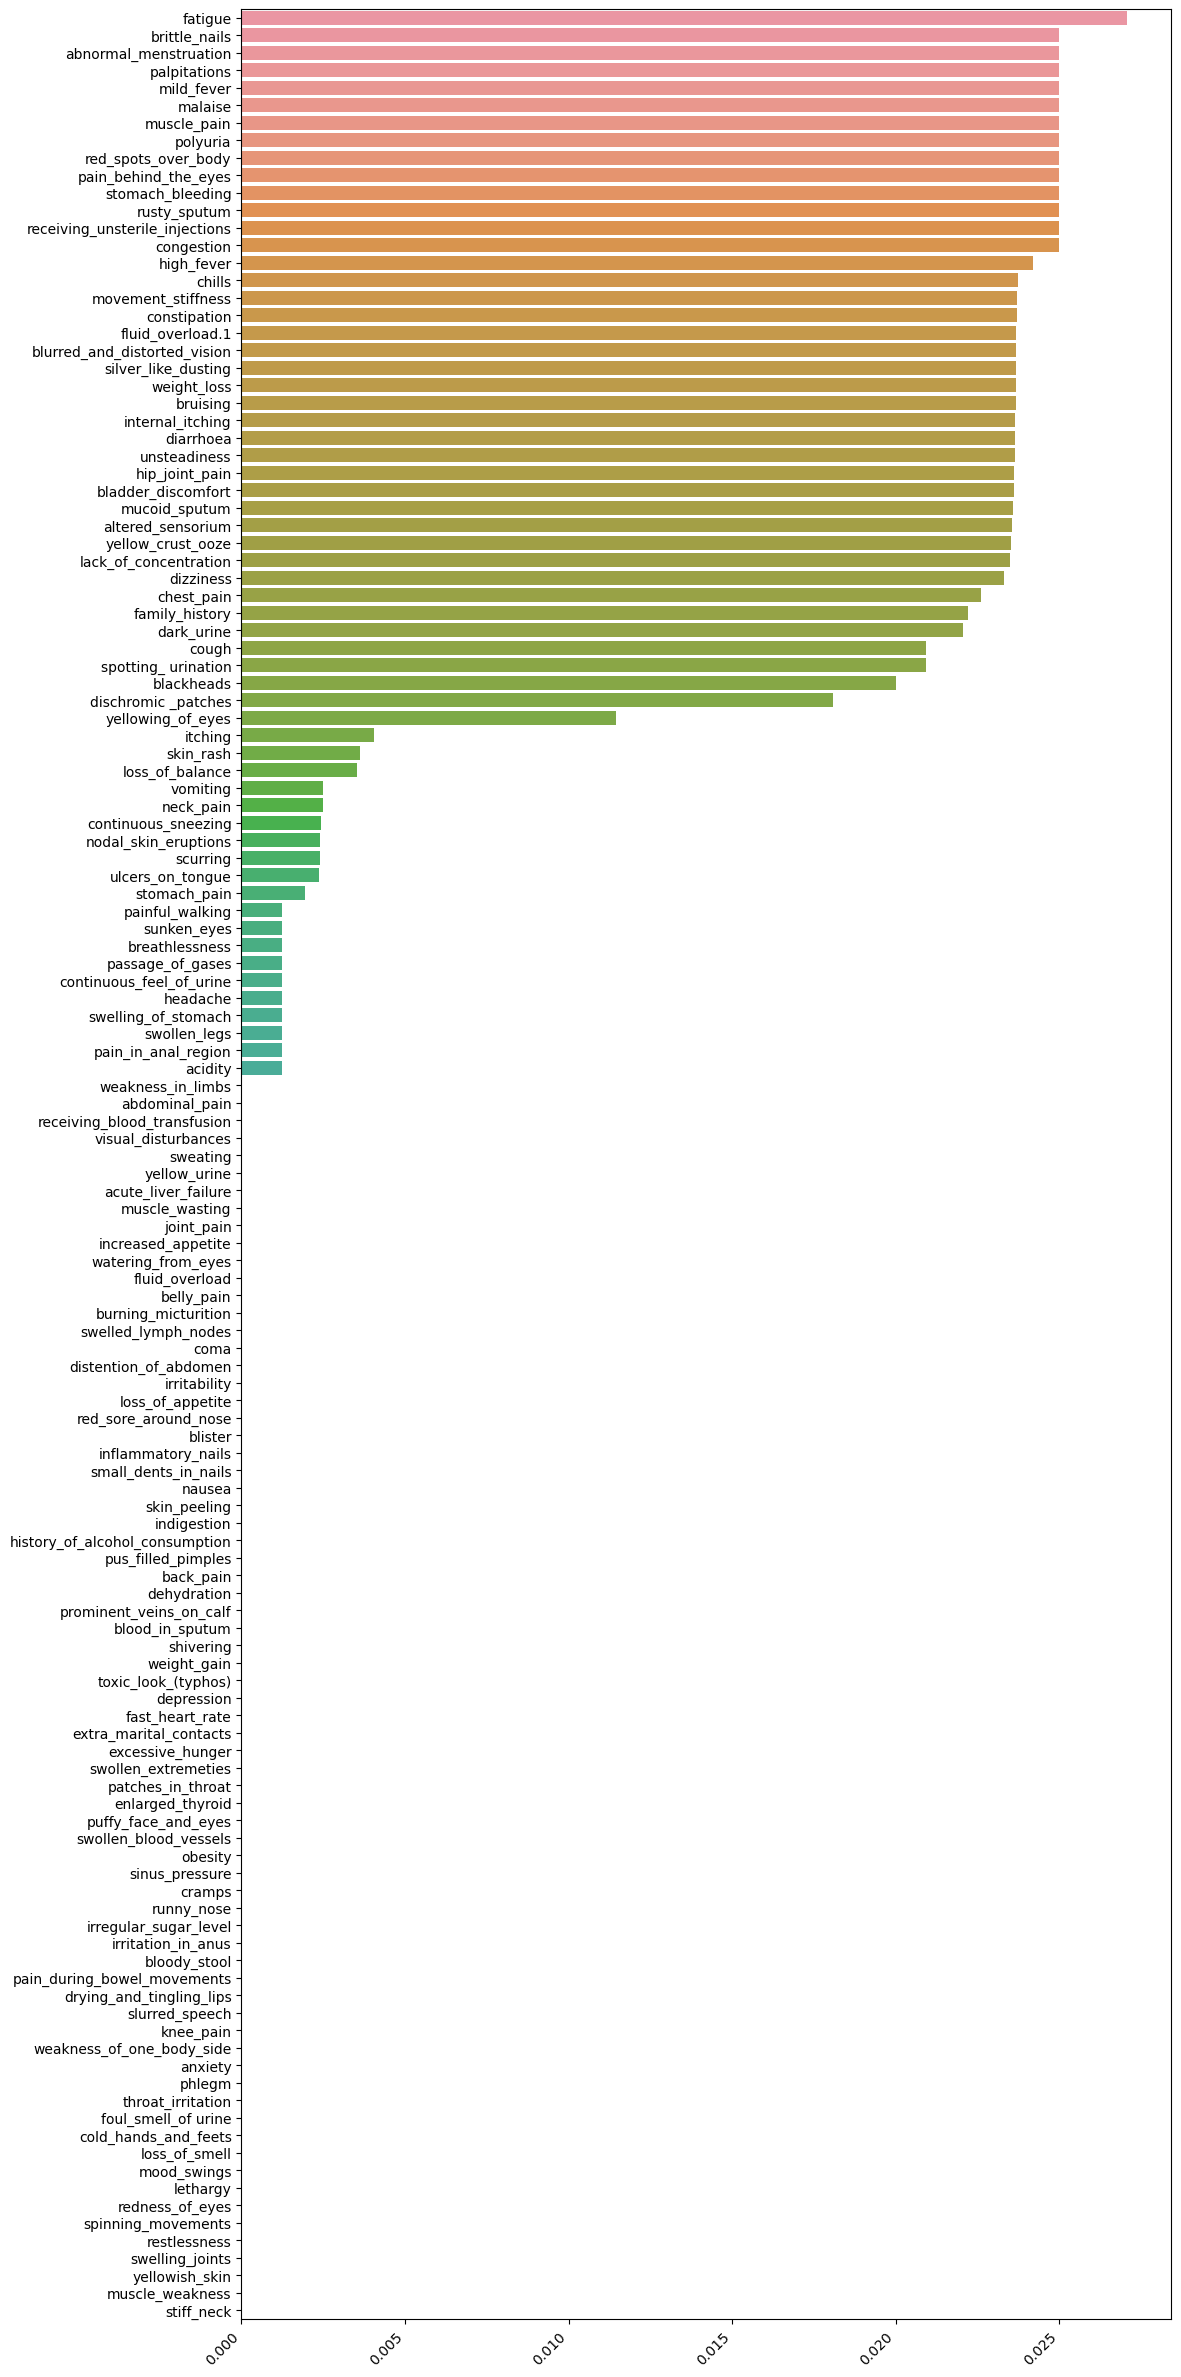

In [86]:
plt.figure(figsize = (12,30))
chart = sns.barplot(x=fi, y=fi.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [87]:
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [88]:
cvs = cross_validate(clf, X, y, cv = 10, return_estimator=True)

In [89]:
cvs['test_score'].mean()

1.0

In [90]:
cvs['estimator']

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier()]

In [91]:
fi = []
classification_reports = []
for model in cvs['estimator']:
    fi.append(list(model.feature_importances_))

fi_avg = np.mean(fi, axis = 0)

/var/folders/n3/3rgmf1957v370m0_cpff1flr0000gn/T/ipykernel_96664/1513019228.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


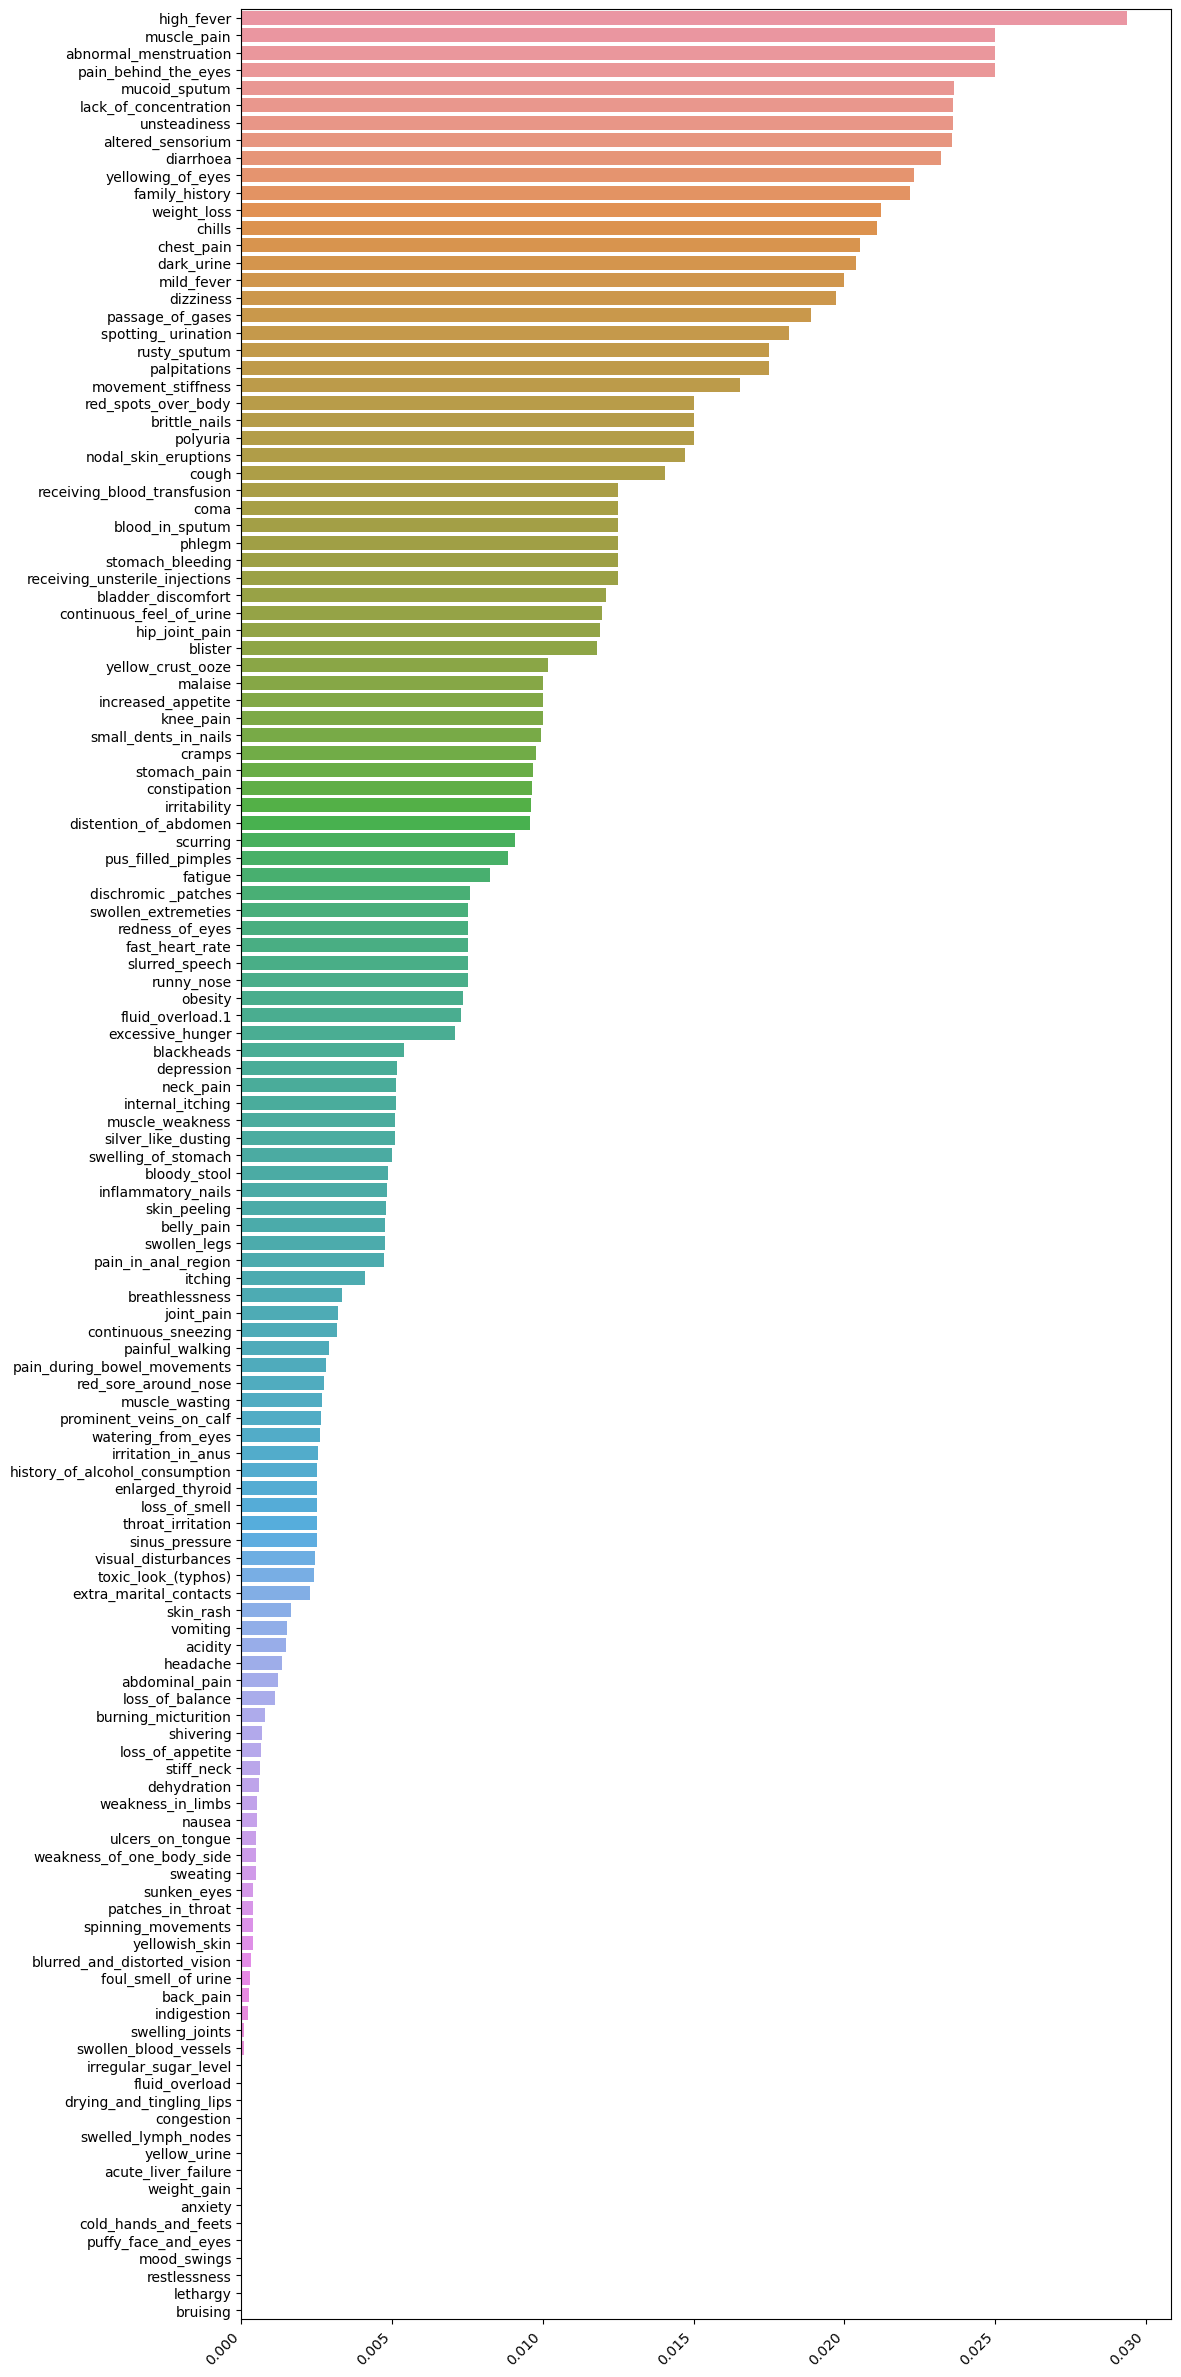

In [93]:
fi_avg = pd.Series(fi_avg, index=X.columns).sort_values(ascending = False)

plt.figure(figsize = (12,30))
chart = sns.barplot(x=fi_avg, y=fi_avg.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [95]:
print(metrics.classification_report(y_test, predicted))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [123]:
sel_col = df[['Acne']]


KeyError: "None of [Index(['Acne'], dtype='object')] are in the [columns]"

/Users/ahmadelhatto/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


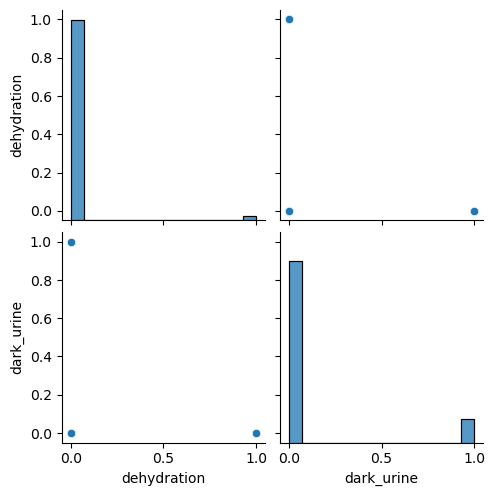

In [125]:
sns.co(data = df[['dehydration','dark_urine']])

In [129]:
X.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


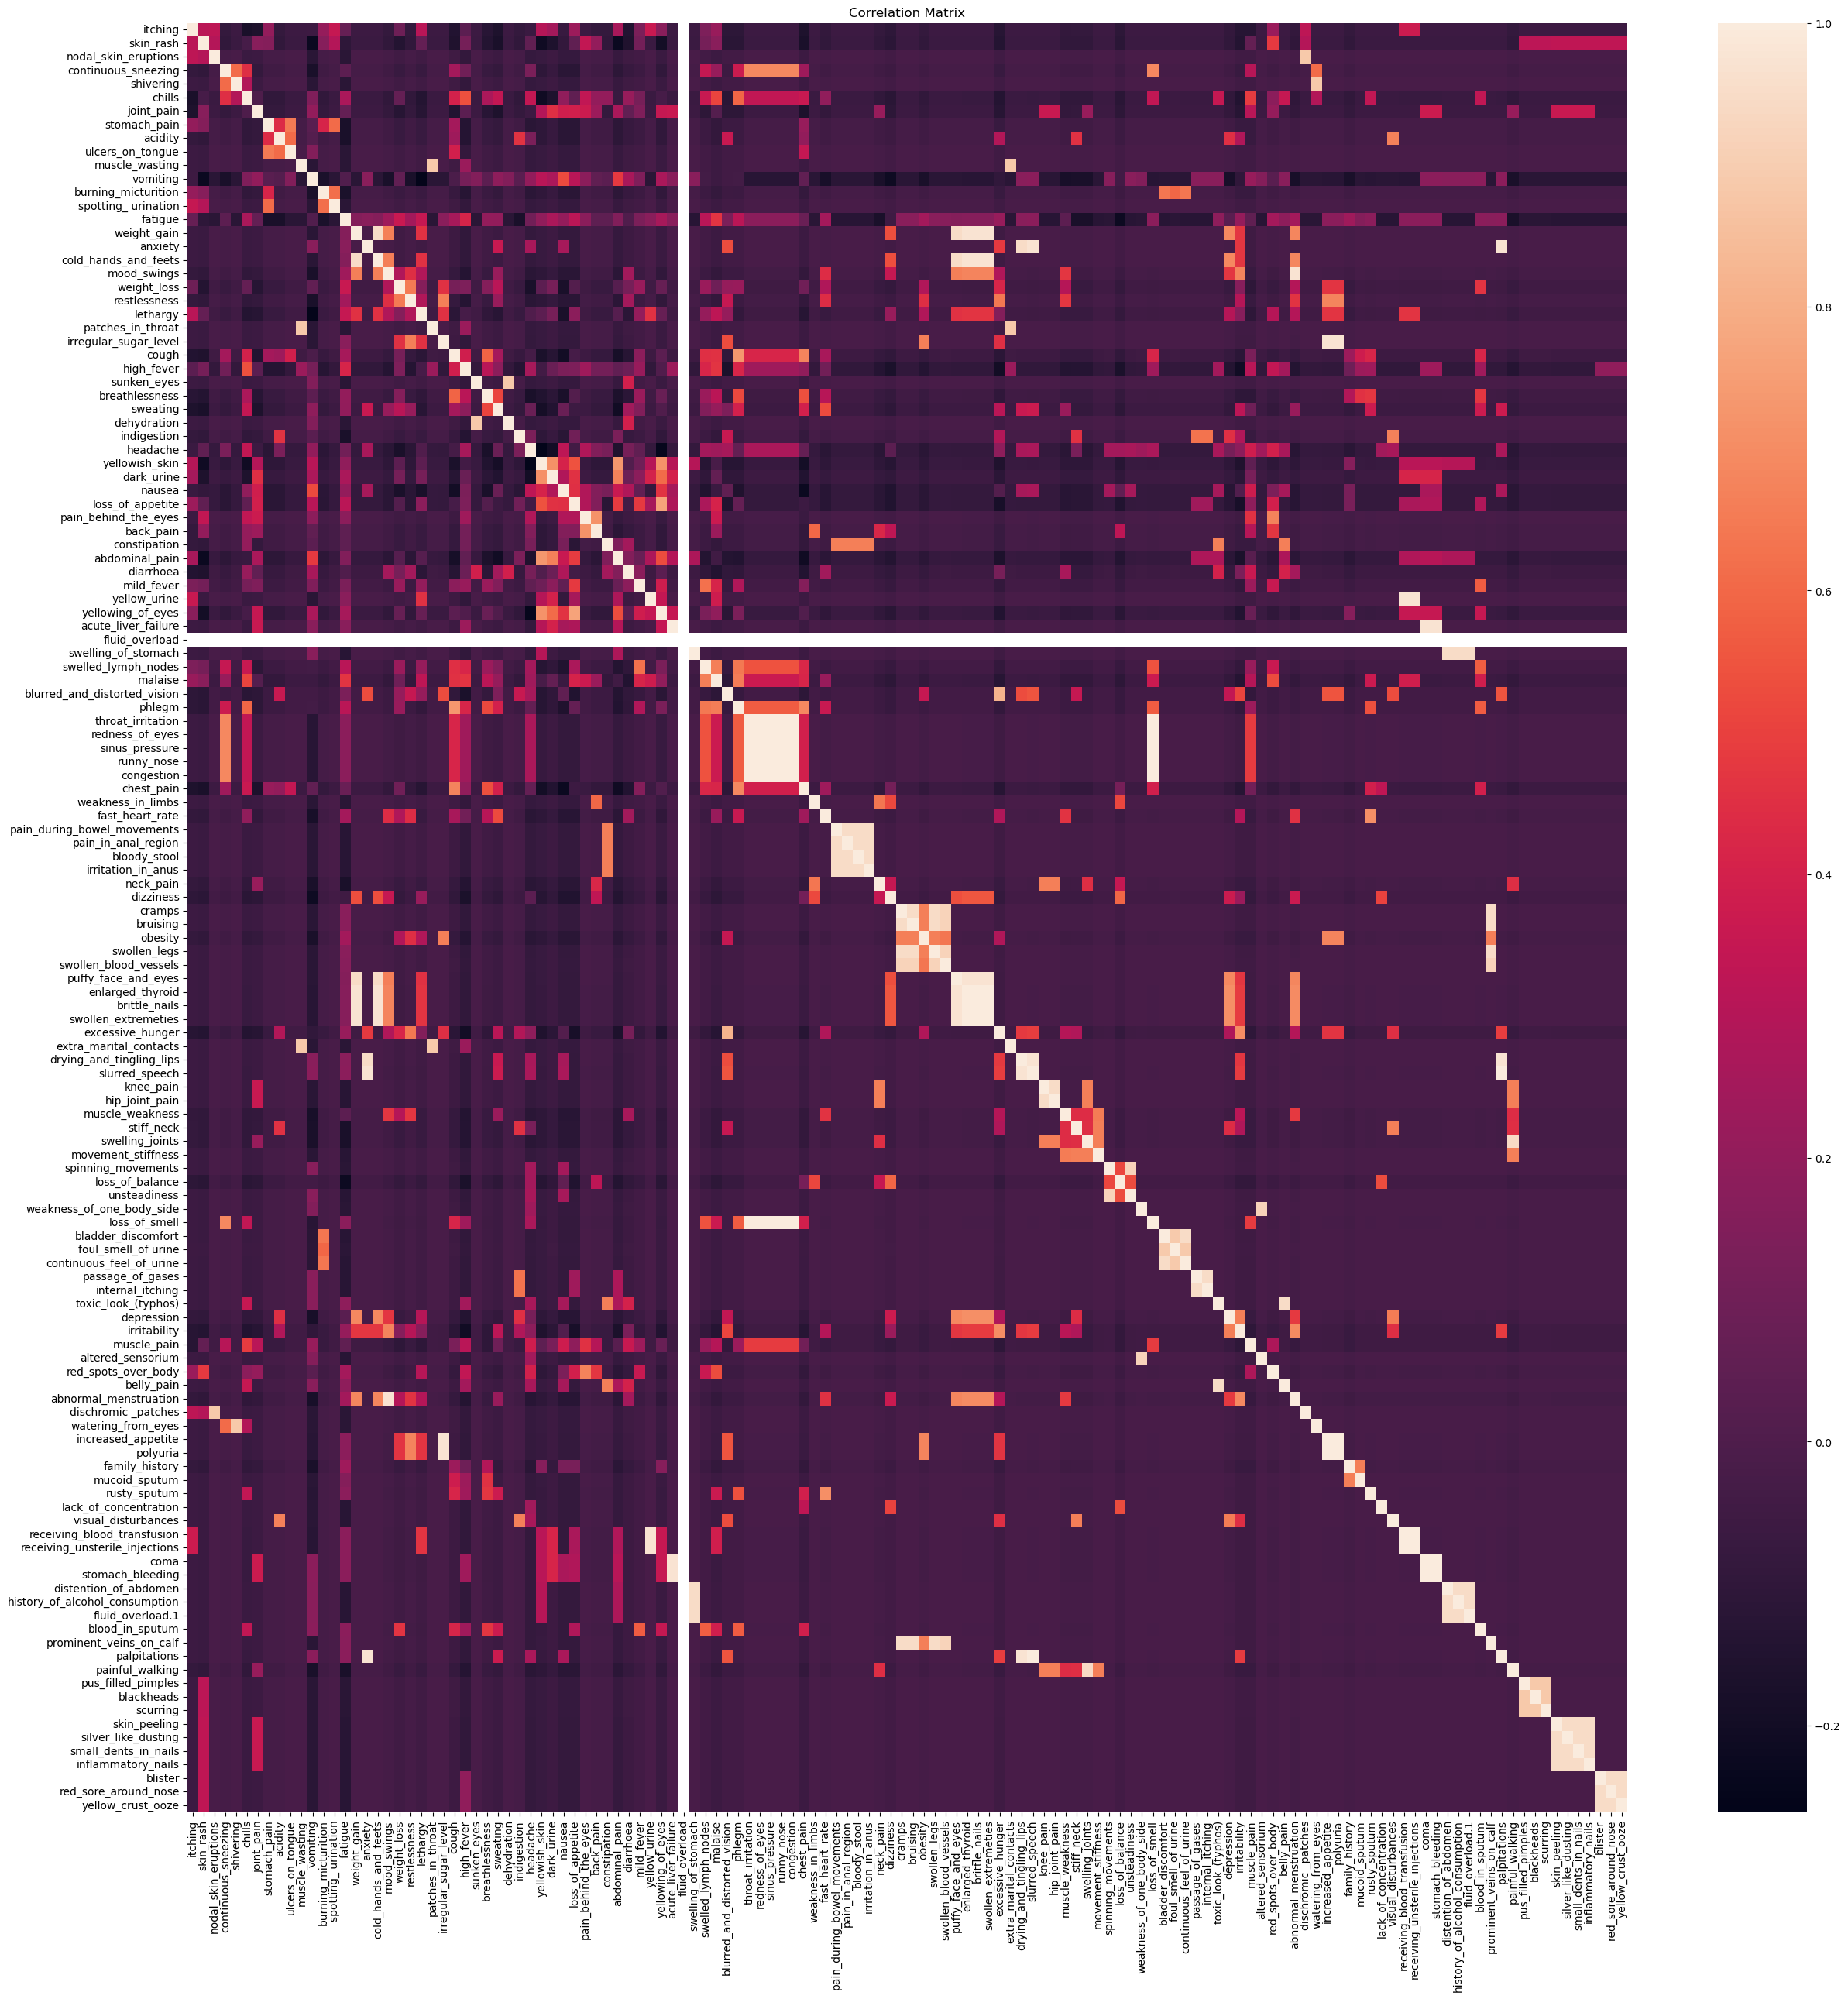

In [139]:
correlation_matrix = X.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=False)
plt.title("Correlation Matrix")
plt.show()

In [143]:
for col in df.columns:
    print(col)

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi